# Exploratory Data Analysis

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
df = pd.read_csv('final')
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,Inside,Gtl,CollgCr,...,0,0,0,0,0,2,2008,WD,Normal,208500.0
1,20,RL,80.0,9600,Pave,Reg,Lvl,FR2,Gtl,Veenker,...,0,0,0,0,0,5,2007,WD,Normal,181500.0
2,60,RL,68.0,11250,Pave,IR1,Lvl,Inside,Gtl,CollgCr,...,0,0,0,0,0,9,2008,WD,Normal,223500.0
3,70,RL,60.0,9550,Pave,IR1,Lvl,Corner,Gtl,Crawfor,...,272,0,0,0,0,2,2006,WD,Abnorml,140000.0
4,60,RL,84.0,14260,Pave,IR1,Lvl,FR2,Gtl,NoRidge,...,0,0,0,0,0,12,2008,WD,Normal,250000.0


In [6]:
df.tail()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
2914,160,RM,21.0,1936,Pave,Reg,Lvl,Inside,Gtl,MeadowV,...,0,0,0,0,0,6,2006,WD,Normal,NaN
2915,160,RM,21.0,1894,Pave,Reg,Lvl,Inside,Gtl,MeadowV,...,0,0,0,0,0,4,2006,WD,Abnorml,NaN
2916,20,RL,160.0,20000,Pave,Reg,Lvl,Inside,Gtl,Mitchel,...,0,0,0,0,0,9,2006,WD,Abnorml,NaN
2917,85,RL,62.0,10441,Pave,Reg,Lvl,Inside,Gtl,Mitchel,...,0,0,0,0,700,7,2006,WD,Normal,NaN
2918,60,RL,74.0,9627,Pave,Reg,Lvl,Inside,Mod,Mitchel,...,0,0,0,0,0,11,2006,WD,Normal,NaN


In [7]:
df.shape

(2919, 75)

In [8]:
categorical_features = ['MSZoning','Street','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood',
                        'Condition1','Condition2','BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
                         'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
                        'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'BsmtFullBath',
                        'BsmtHalfBath', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageCars', 'GarageQual',
                        'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition', 'FullBath', 'HalfBath', 'BedroomAbvGr',
                        'KitchenAbvGr', 'TotRmsAbvGrd', 'MoSold']

In [9]:
numeric_features = ['MSSubClass','LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF',
                    '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'Fireplaces', 'GarageYrBlt', 'GarageArea', 'WoodDeckSF', 
                    'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'YrSold']


In [10]:
len(categorical_features) + len(numeric_features)

69

## Distribution of Sale Price

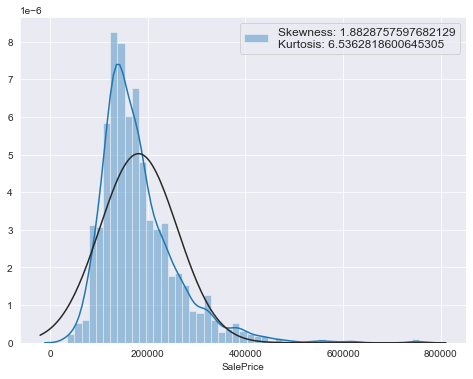

In [25]:
from scipy.stats import norm

plt.figure(figsize= (8,6))
sns.distplot(df['SalePrice'].iloc[:1460] , 
             label = "Skewness: {}\nKurtosis: {}".format(df['SalePrice'].skew() , df['SalePrice'].kurtosis()) ,fit = norm)
plt.legend(fontsize = 'large')

### 1. Right skewed
### 2. Shows peakednesss

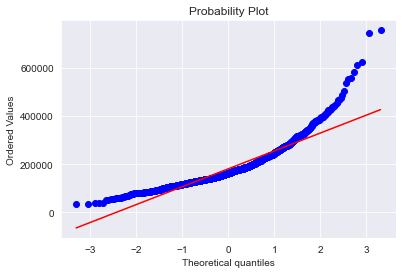

In [21]:
from scipy import stats

sns.set_style('darkgrid')
res = stats.probplot(df['SalePrice'].iloc[:1460], plot=plt)

## Handling Outliers

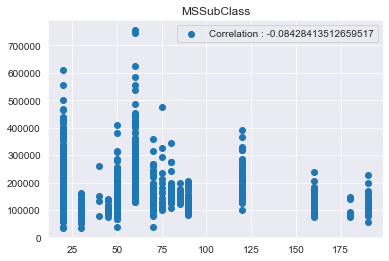

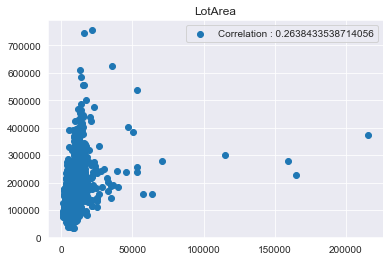

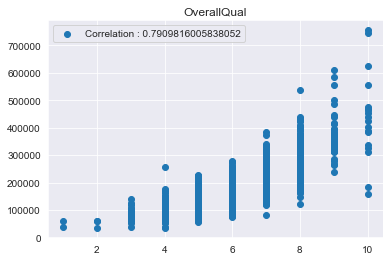

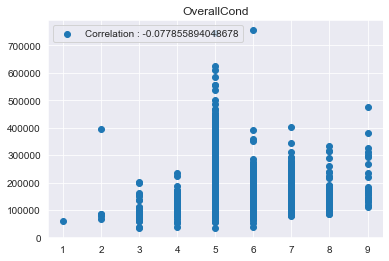

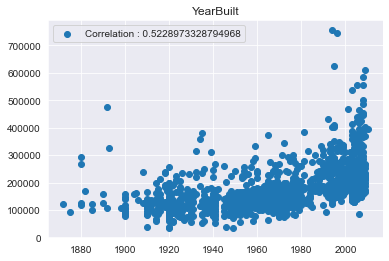

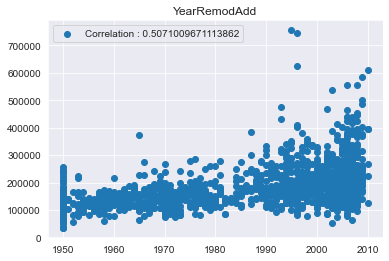

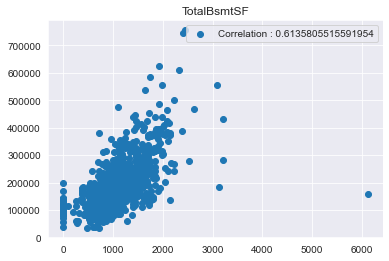

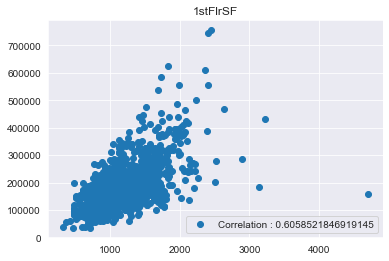

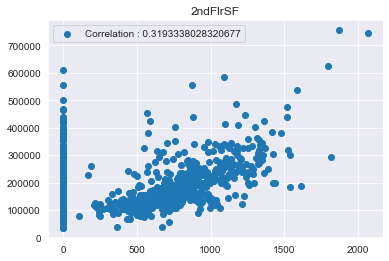

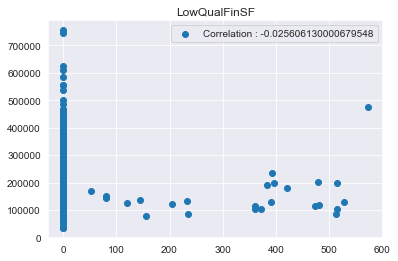

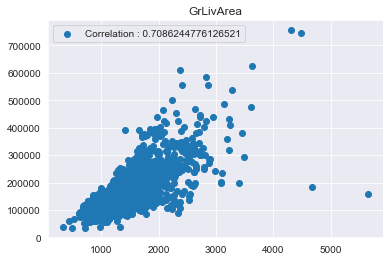

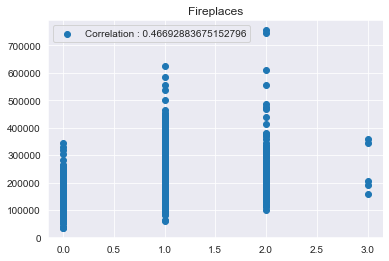

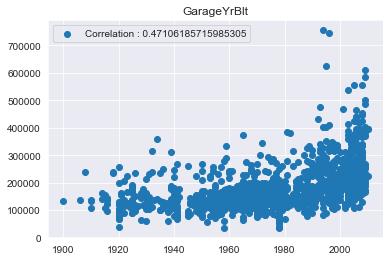

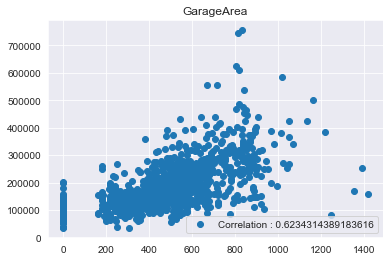

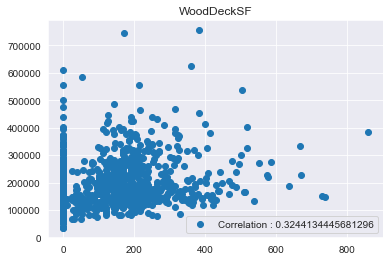

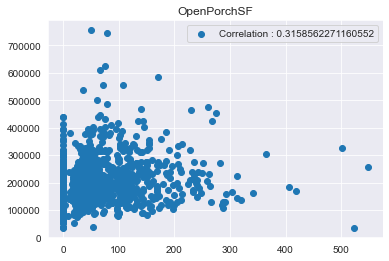

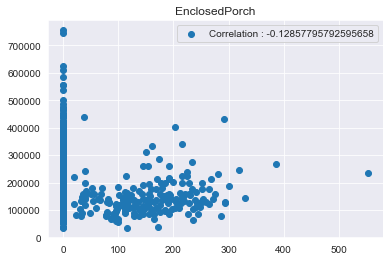

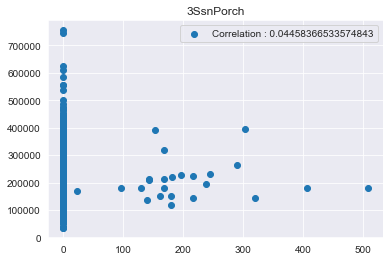

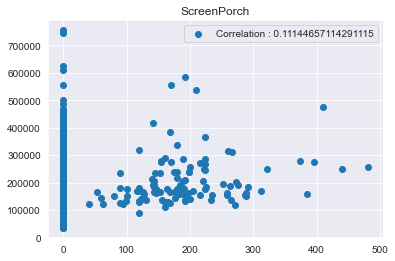

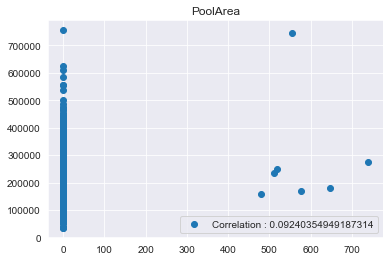

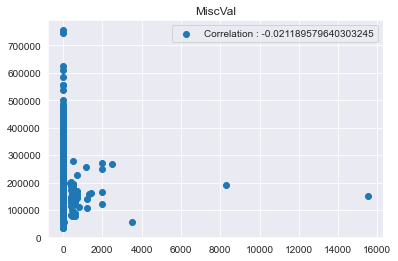

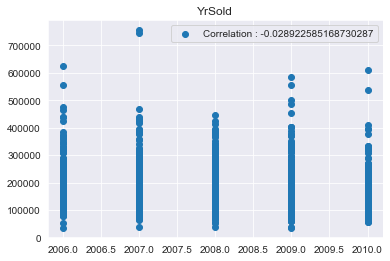

In [9]:
sns.set_style('darkgrid')
for i in numeric_features:
    plt.scatter(df[i] , df['SalePrice'] , label = "Correlation : {}".format(df[i].corr(df['SalePrice'])))
    plt.title(i)
    plt.legend()
    plt.show()

### Inferences

1. TotalBsmtSF has high correlation with SalePrice
2. 


In [23]:
df[df['TotalBsmtSF']==0][['BsmtFullBath' ,'BsmtHalfBath' ,
                                         'BsmtFinType2' ,  'BsmtFinType1' , 'BsmtExposure' , 'BsmtCond' , 'BsmtQual']]

,BsmtFullBath,BsmtHalfBath,BsmtFinType2,BsmtFinType1,BsmtExposure,BsmtCond,BsmtQual
17,0.0,0.0,Unf,Unf,No,TA,TA
39,0.0,0.0,Unf,Unf,No,TA,TA
90,0.0,0.0,Unf,Unf,No,TA,TA
102,0.0,0.0,Unf,Unf,No,TA,TA
156,0.0,0.0,Unf,Unf,No,TA,TA
...,...,...,...,...,...,...,...
2803,0.0,0.0,Unf,Unf,No,TA,TA
2804,0.0,0.0,Unf,Unf,No,TA,TA
2824,0.0,0.0,Unf,Unf,No,TA,TA
2891,0.0,0.0,Unf,Unf,No,TA,TA


In [191]:
df.tail()

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
2914,160,RM,1936,Pave,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,...,0,0,0,0,0,6,2006,WD,Normal,NaN
2915,160,RM,1894,Pave,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,...,0,0,0,0,0,4,2006,WD,Abnorml,NaN
2916,20,RL,20000,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,...,0,0,0,0,0,9,2006,WD,Abnorml,NaN
2917,85,RL,10441,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,...,0,0,0,0,700,7,2006,WD,Normal,NaN
2918,60,RL,9627,Pave,Reg,Lvl,AllPub,Inside,Mod,Mitchel,...,0,0,0,0,0,11,2006,WD,Normal,NaN


In [31]:
df.drop(df[df['MiscVal']>8000].head(2).index ,axis = 0, inplace = True)

In [32]:
df.drop(df[df['TotalBsmtSF']>6000].index ,axis = 0, inplace = True)

In [33]:
df[df['GrLivArea']>4000][['GrLivArea' , 'SalePrice']]

,GrLivArea,SalePrice
523,4676,184750.0
691,4316,755000.0
1182,4476,745000.0
2549,5095,NaN


In [34]:
df.drop(df[df['GrLivArea']==4676].index , axis = 0 , inplace = True)

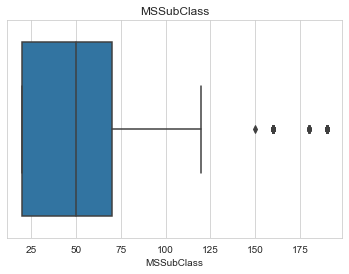

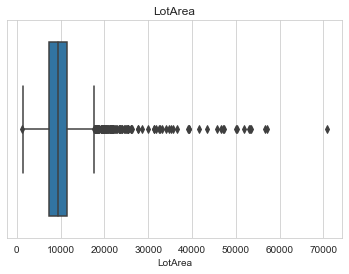

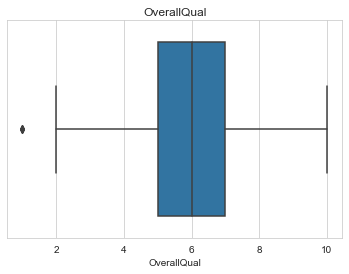

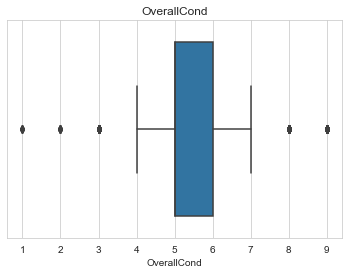

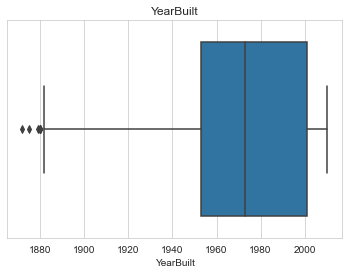

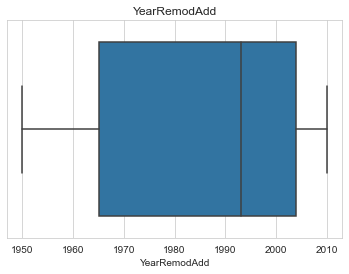

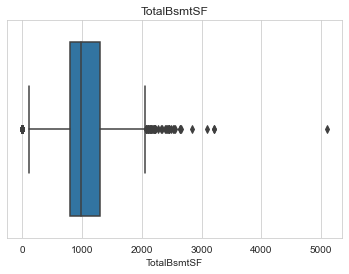

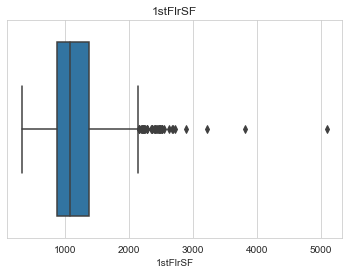

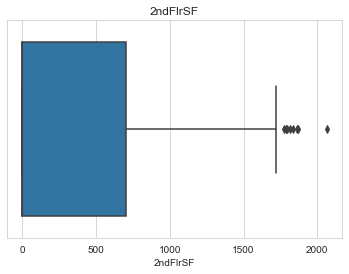

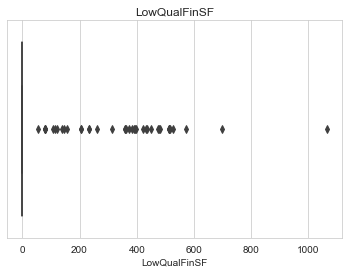

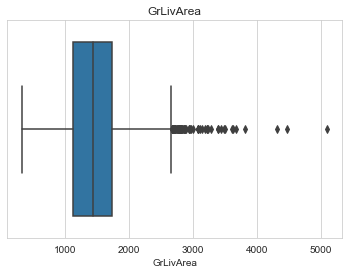

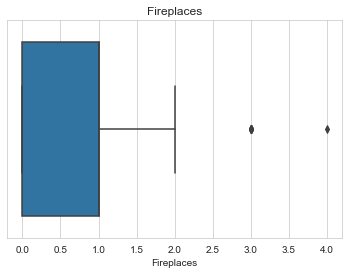

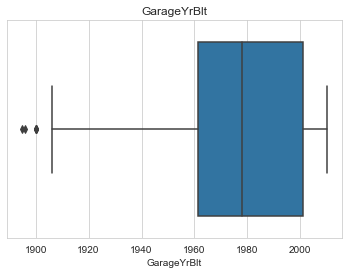

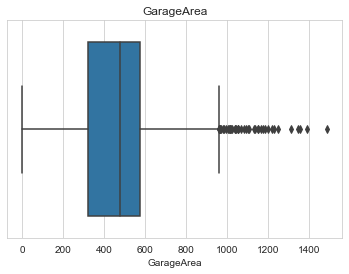

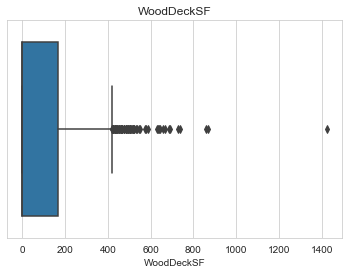

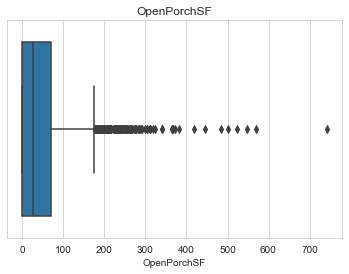

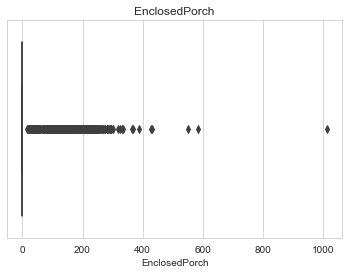

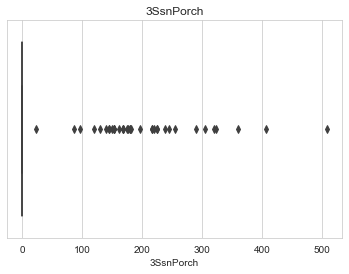

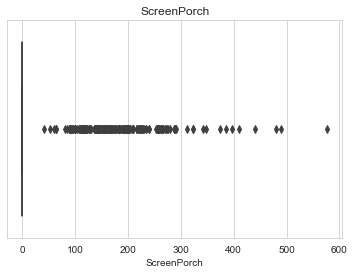

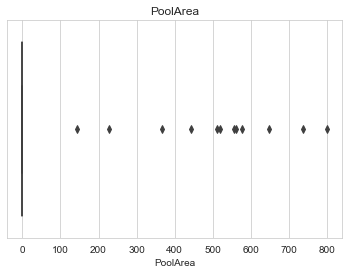

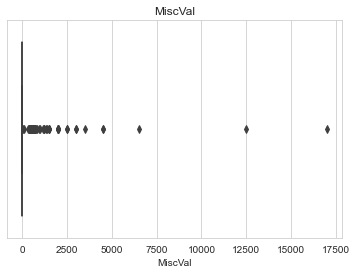

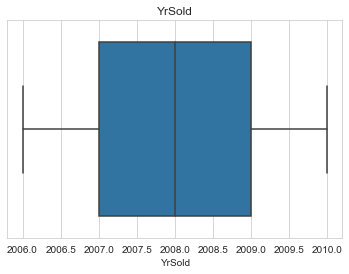

In [147]:
sns.set_style('whitegrid')
for i in numeric_features:
    sns.boxplot(df[i])
    plt.title(i)
    plt.show()

In [35]:
df[df['GarageYrBlt']>2010]['GarageYrBlt']

2592    2207.0
Name: GarageYrBlt, dtype: float64

In [36]:
df['GarageYrBlt'].replace(2207.0 , 2010.0 , inplace = True)

In [37]:
df.drop(df[df['LotArea']>100000].index ,axis = 0, inplace = True)

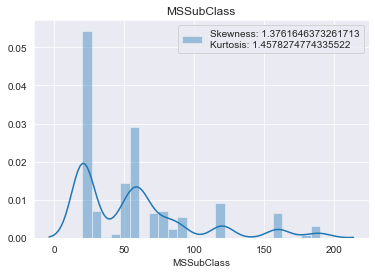

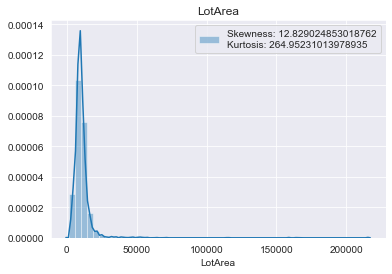

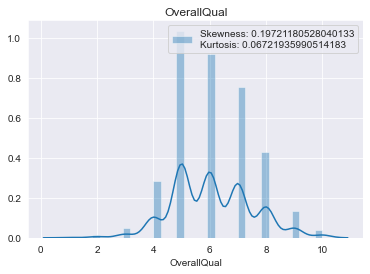

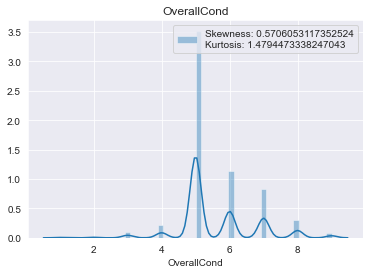

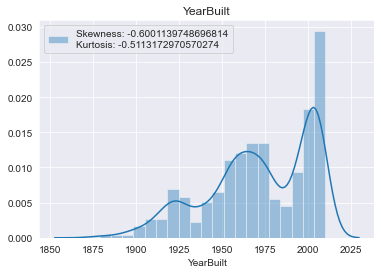

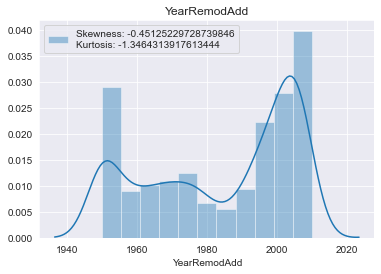

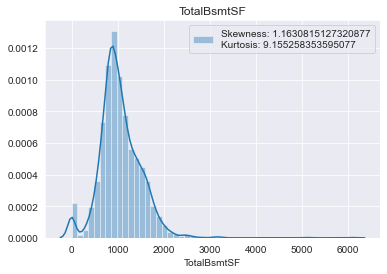

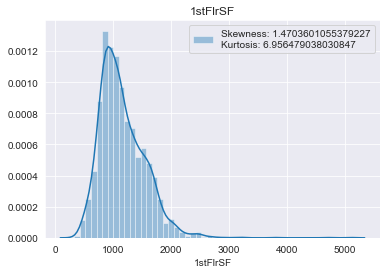

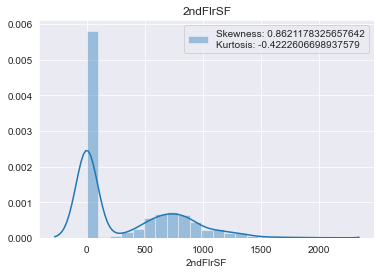

C:\Users\RUSSEL\ANACONDA3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


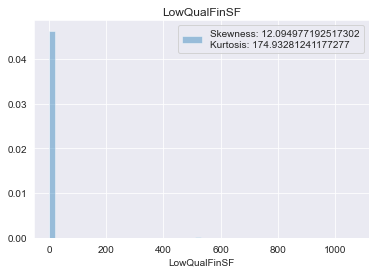

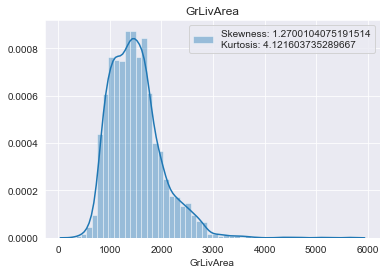

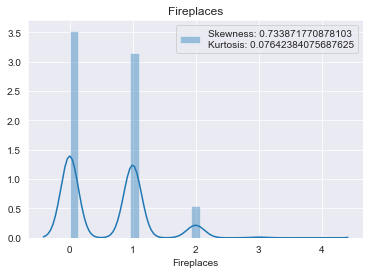

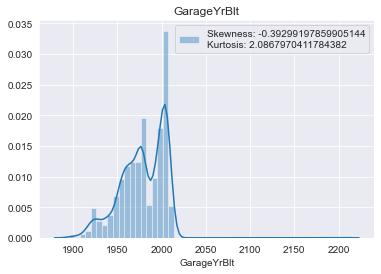

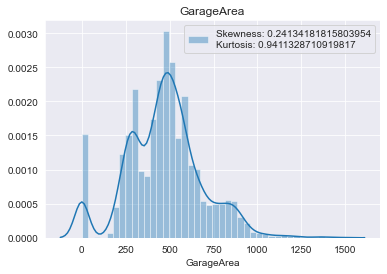

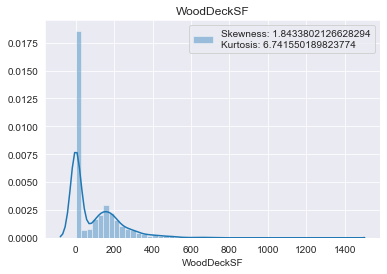

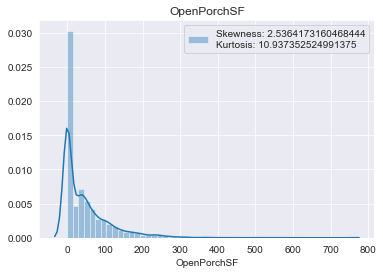

C:\Users\RUSSEL\ANACONDA3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


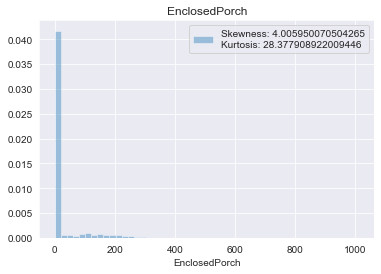

C:\Users\RUSSEL\ANACONDA3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


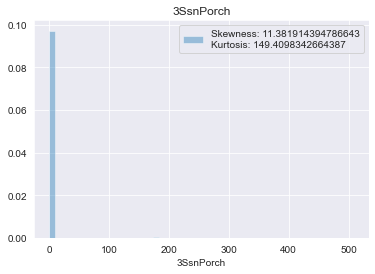

C:\Users\RUSSEL\ANACONDA3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


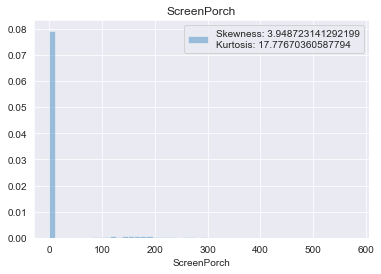

C:\Users\RUSSEL\ANACONDA3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


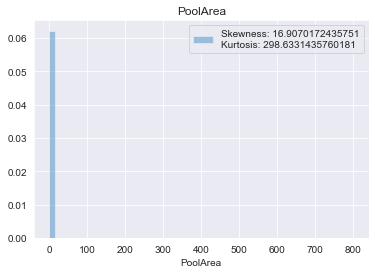

C:\Users\RUSSEL\ANACONDA3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


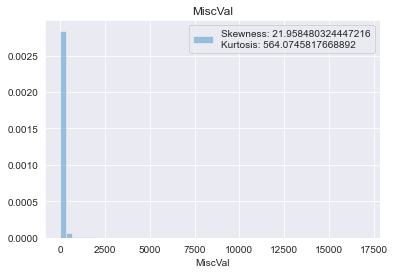

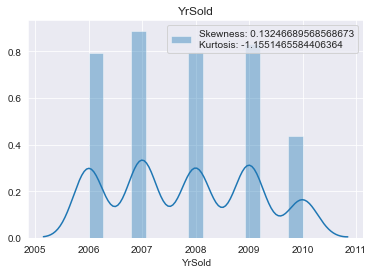

In [7]:
sns.set_style('darkgrid')
for i in numeric_features:
    sns.distplot(df[i] , label = "Skewness: {}\nKurtosis: {}".format(df[i].skew() , df[i].kurtosis()))
    plt.title(i)
    plt.legend()
    plt.show()

## Categorical Features

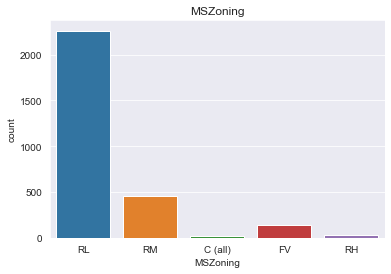

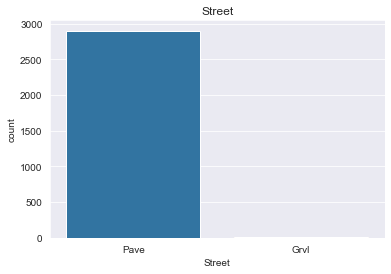

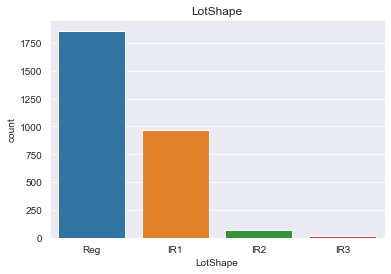

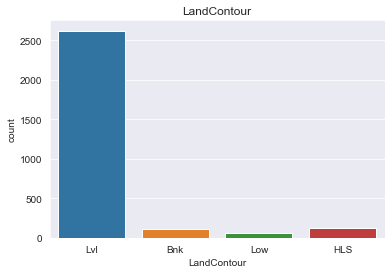

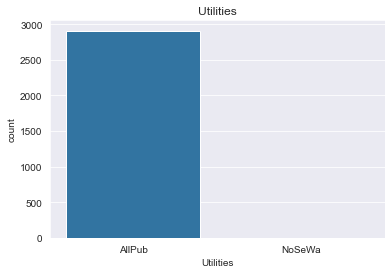

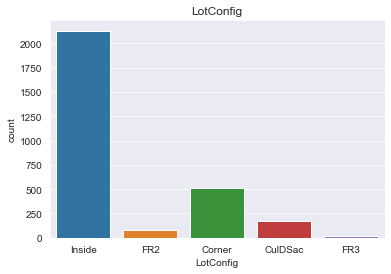

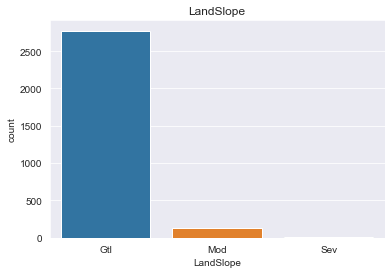

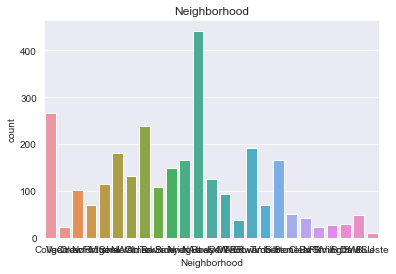

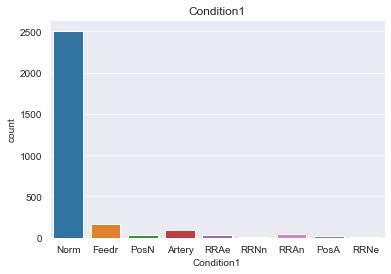

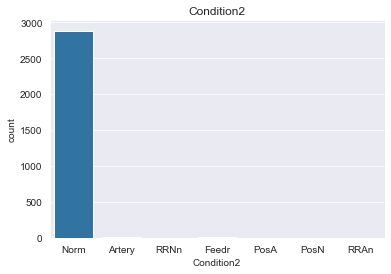

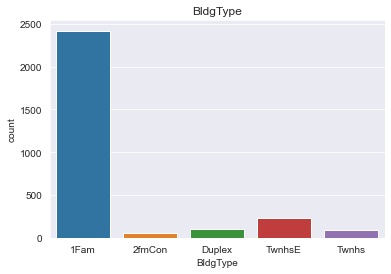

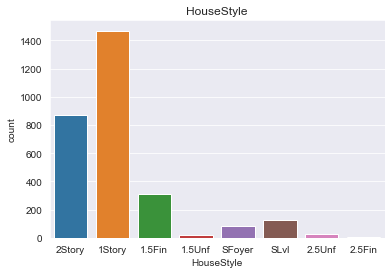

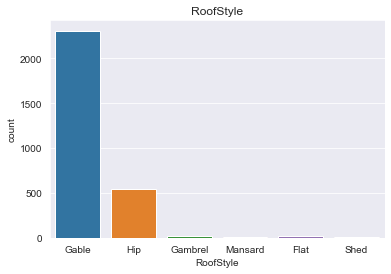

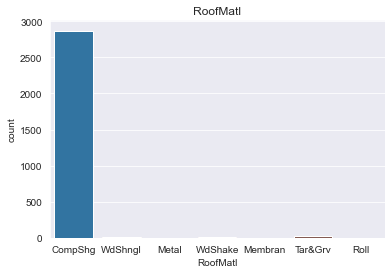

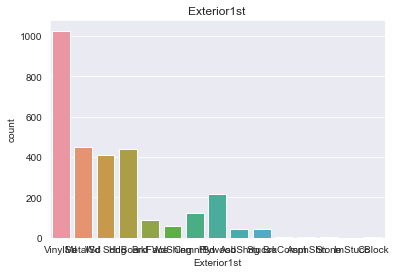

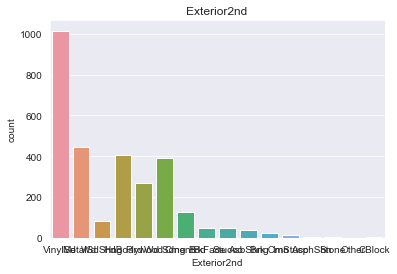

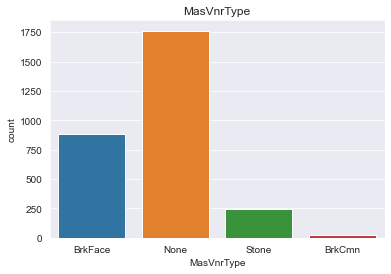

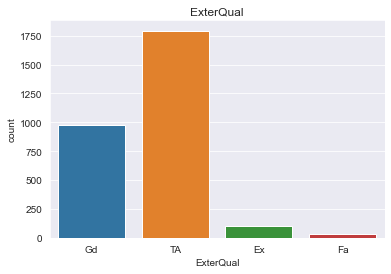

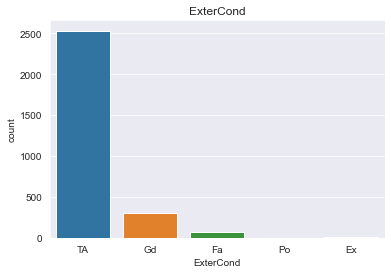

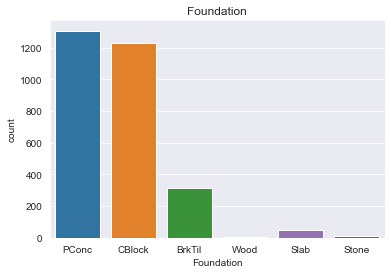

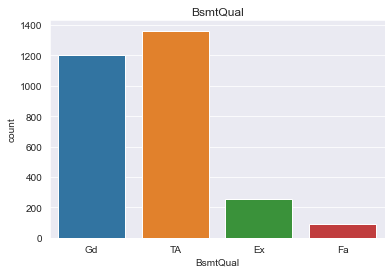

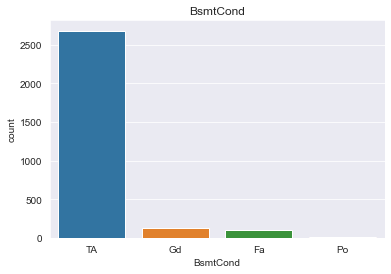

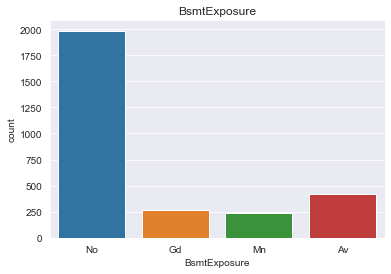

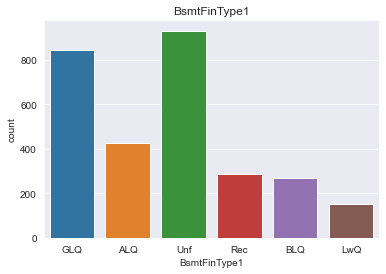

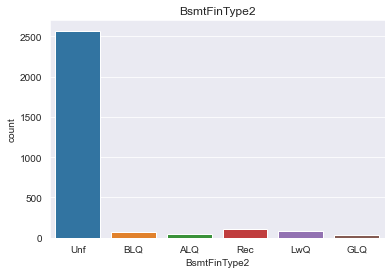

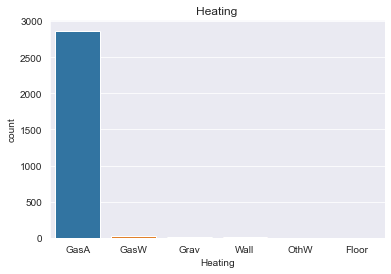

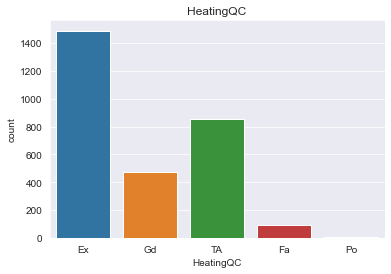

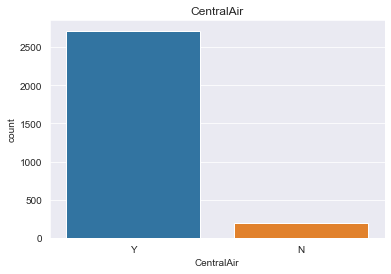

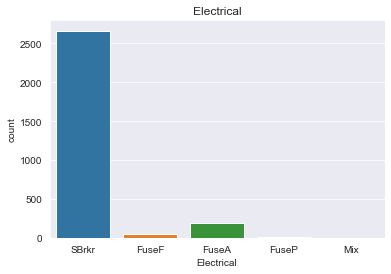

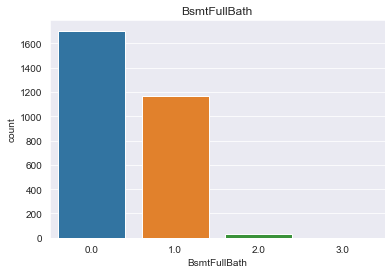

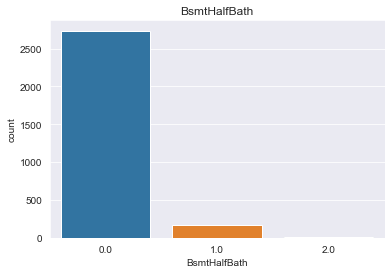

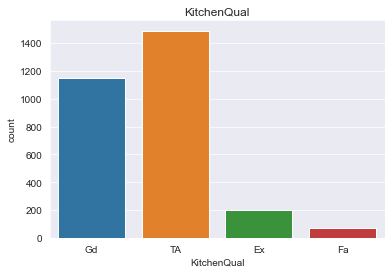

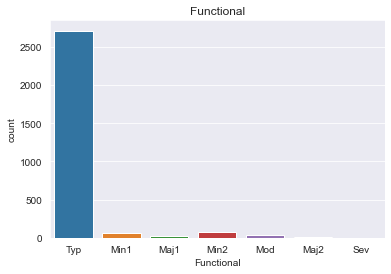

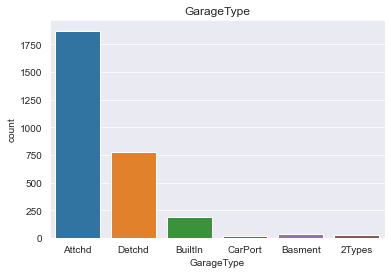

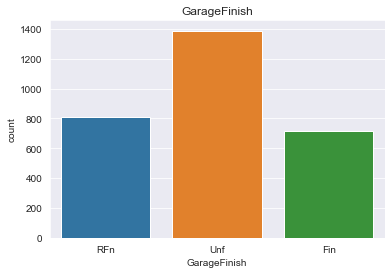

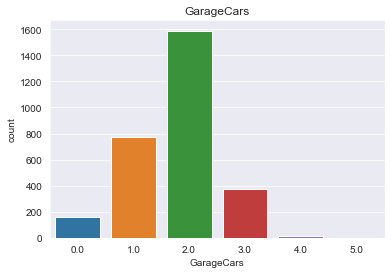

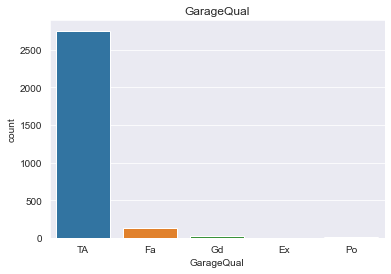

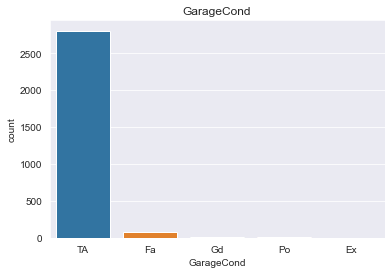

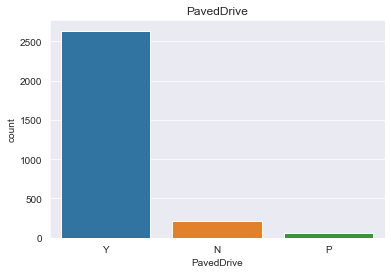

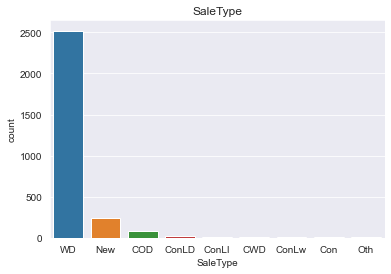

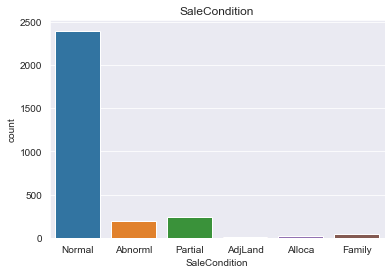

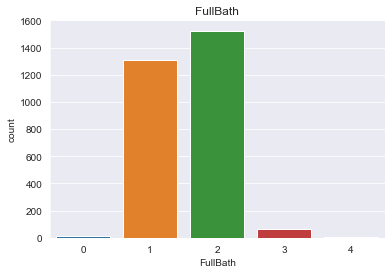

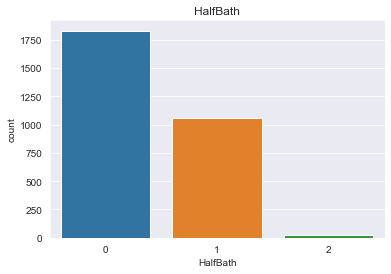

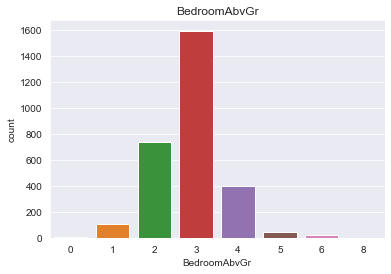

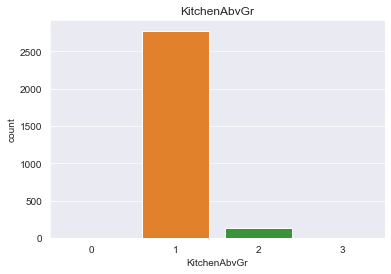

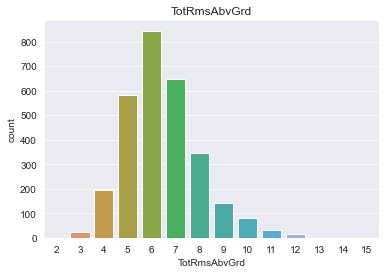

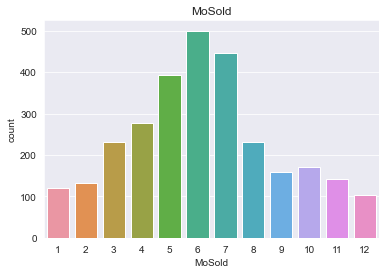

In [149]:
sns.set_style('darkgrid')
for i in categorical_features:
    sns.countplot(df[i])
    plt.title(i)
    plt.show()

In [209]:
df['RoofMatl'].value_counts()

CompShg    2869
Tar&Grv      23
WdShake       9
WdShngl       7
Metal         1
Membran       1
Roll          1
Name: RoofMatl, dtype: int64

In [38]:
df['RoofMatl'].replace(['WdShake' , 'WdShngl' ,'Metal' , 'Membran' , 'Roll'] , 'Others' , inplace =True)

In [39]:
df['RoofMatl'].value_counts()

CompShg    2869
Tar&Grv      23
Others       19
Name: RoofMatl, dtype: int64

In [40]:
df['Exterior1st'].value_counts()

VinylSd    1026
MetalSd     449
HdBoard     442
Wd Sdng     410
Plywood     218
CemntBd     125
BrkFace      86
WdShing      56
AsbShng      44
Stucco       42
BrkComm       6
Stone         2
AsphShn       2
CBlock        2
ImStucc       1
Name: Exterior1st, dtype: int64

In [41]:
df['Exterior1st'].replace(['BrkComm' , 'Stone' ,'CBlock' , 'AsphShn' , 'ImStucc'] , 'Others' , inplace =True)

In [42]:
df['Exterior1st'].value_counts()

VinylSd    1026
MetalSd     449
HdBoard     442
Wd Sdng     410
Plywood     218
CemntBd     125
BrkFace      86
WdShing      56
AsbShng      44
Stucco       42
Others       13
Name: Exterior1st, dtype: int64

In [43]:
df['Exterior2nd'].value_counts()

VinylSd    1015
MetalSd     446
HdBoard     405
Wd Sdng     391
Plywood     267
CmentBd     125
Wd Shng      81
BrkFace      46
Stucco       46
AsbShng      38
Brk Cmn      22
ImStucc      15
Stone         6
AsphShn       4
CBlock        3
Other         1
Name: Exterior2nd, dtype: int64

### Saving the data for further preprocessing

In [44]:
df.to_csv('eda_final')